In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Read the data from the CSV files
train_data = pd.read_csv("./English datasets/Preprocessed Datasets/final_train_en.csv")
validation_data = pd.read_csv("./English datasets/Preprocessed Datasets/final_val_en.csv")
test_data = pd.read_csv("./English datasets/Preprocessed Datasets/final_test_en_labeled.csv")

# Analyze the statistics of the dataset
train_data_stats = train_data.describe()
validation_data_stats = validation_data.describe()
test_data_stats = test_data.describe()
# Print the statistics of the "text" column in the data
print(train_data["text"].describe())

# Calculate the distribution of values in the "binary" column
print(train_data["binary"].value_counts())

# Calculate the distribution of values in the "multiclass" column
print(train_data["multiclass"].value_counts())

count                                                  6192
unique                                                 6176
top       trade mission conclude in london us representa...
freq                                                      4
Name: text, dtype: object
binary
Hope        3104
Not Hope    3088
Name: count, dtype: int64
multiclass
Not Hope            3088
Generalized Hope    1726
Realistic Hope       730
Unrealistic Hope     648
Name: count, dtype: int64


# Binary Classification

In [10]:
# Extract the features and labels
X_train = train_data["text"]
y_train = train_data["binary"]

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Print the head of the transformed data
print(X_train_tfidf.toarray()[:5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
# Set up the SVM model
svm_model = SVC()

# Define the parameter grid for GridSearchCV
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}

# Set up the GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5)

# Train the SVM model using GridSearchCV
grid_search.fit(X_train_tfidf, y_train)

# Print the best parameters found by GridSearchCV
print("Best parameters:", grid_search.best_params_)

Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [12]:
# Fit the TF-IDF vectorizer
vectorizer.fit(X_train)

# Transform the test data
X_test_tfidf = vectorizer.transform(test_data["text"])

In [13]:
from sklearn.metrics import classification_report

# Make predictions on the test data
y_pred = grid_search.predict(X_test_tfidf)

# Print the classification report
print(classification_report(test_data["binary"], y_pred))

              precision    recall  f1-score   support

        Hope       0.81      0.81      0.81       541
    Not Hope       0.79      0.79      0.79       491

    accuracy                           0.80      1032
   macro avg       0.80      0.80      0.80      1032
weighted avg       0.80      0.80      0.80      1032



Confusion matrix for binary classification:
[[438 103]
 [102 389]]


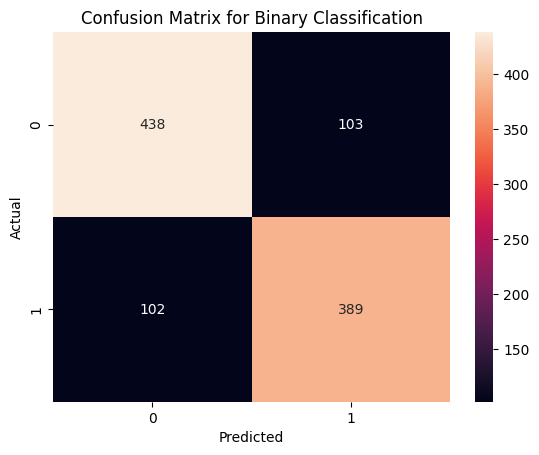

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the confusion matrix for binary classification
cm_binary = confusion_matrix(test_data["binary"], y_pred)
print("Confusion matrix for binary classification:")
print(cm_binary)
# Plot the confusion matrix for binary classification
sns.heatmap(cm_binary, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Binary Classification')

plt.show()

# Multiclass Classification

In [14]:
# Extract the features and labels
X_train_multiclass = train_data["text"]
y_train_multiclass = train_data["multiclass"]

# Create a new TF-IDF vectorizer
vectorizer_multiclass = TfidfVectorizer()

# Transform the training data
X_train_tfidf_multiclass = vectorizer_multiclass.fit_transform(X_train_multiclass)

# Set up the SVM model for multiclass classification
svm_model_multiclass = SVC()

# Define the parameter grid for GridSearchCV
param_grid_multiclass = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}

# Set up the GridSearchCV for multiclass classification
grid_search_multiclass = GridSearchCV(svm_model_multiclass, param_grid_multiclass, cv=5)

# Train the SVM model using GridSearchCV for multiclass classification
grid_search_multiclass.fit(X_train_tfidf_multiclass, y_train_multiclass)

# Fit the TF-IDF vectorizer on the training data for multiclass classification
vectorizer_multiclass.fit(X_train_multiclass)

# Transform the test data for multiclass classification
X_test_tfidf_multiclass = vectorizer_multiclass.transform(test_data["text"])

# Make predictions on the test data for multiclass classification
y_pred_multiclass = grid_search_multiclass.predict(X_test_tfidf_multiclass)

# Print the classification report for multiclass classification
print(classification_report(test_data["multiclass"], y_pred_multiclass))

                  precision    recall  f1-score   support

Generalized Hope       0.61      0.63      0.62       309
        Not Hope       0.71      0.87      0.79       491
  Realistic Hope       0.45      0.21      0.29       124
Unrealistic Hope       0.62      0.31      0.41       108

        accuracy                           0.66      1032
       macro avg       0.60      0.51      0.53      1032
    weighted avg       0.64      0.66      0.64      1032



Confusion matrix for multiclass classification:
Confusion matrix for multiclass classification:
[[196  84  20   9]
 [ 50 429   5   7]
 [ 57  37  26   4]
 [ 17  51   7  33]]


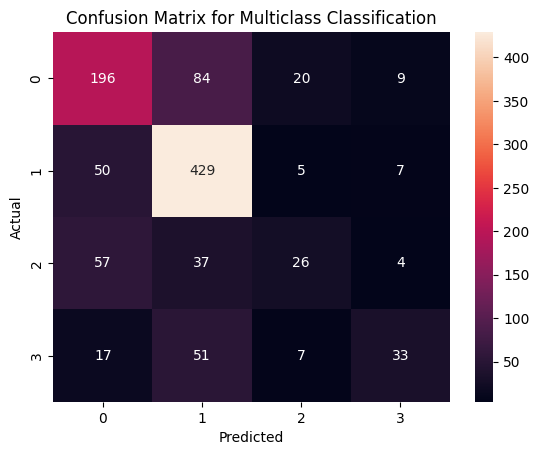

In [18]:
# Compute the confusion matrix for multiclass classification
cm_multiclass = confusion_matrix(test_data["multiclass"], y_pred_multiclass)
print("Confusion matrix for multiclass classification:")
import seaborn as sns

# Compute the confusion matrix for multiclass classification
cm_multiclass = confusion_matrix(test_data["multiclass"], y_pred_multiclass)
print("Confusion matrix for multiclass classification:")
print(cm_multiclass)

# Plot the confusion matrix for multiclass classification
sns.heatmap(cm_multiclass, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Multiclass Classification')

plt.show()